In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.metrics import confusion_matrix as cf
from sklearn.ensemble import RandomForestClassifier


## Loading the training and testing data sets

In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [3]:
#print test_data.head(2)

## finding if any missing values

In [4]:
# missing = x_train.isnull().sum()
# missing = missing[missing > 0]
# print missing

## Partitioning data to input and target variable

In [5]:
x_train = train_data.drop('Activity', axis=1)

y_train = pd.get_dummies(train_data.Activity)  # create dummies from a categorical column of a dataframe

x_test = test_data.drop('Activity', axis=1)
y_test = pd.get_dummies(test_data.Activity)

# find principal components

In [14]:
pca = decomposition.PCA(n_components=200)
x_train_pca = pca.fit_transform(x_train)
print pca.explained_variance_ratio_  # how much info is compressed into the first few components


[  5.95811382e-01   2.51690900e-01   2.00254599e-02   1.68323491e-02
   7.64507036e-03   6.92268940e-03   5.18986920e-03   4.79989114e-03
   4.34756928e-03   3.93855130e-03   3.50639860e-03   3.08577074e-03
   2.74797604e-03   2.36688446e-03   2.21112494e-03   2.00682202e-03
   1.92646866e-03   1.90537687e-03   1.76070929e-03   1.72259311e-03
   1.67610296e-03   1.60212671e-03   1.51803020e-03   1.43708336e-03
   1.38606301e-03   1.33156338e-03   1.29709553e-03   1.23081819e-03
   1.19197400e-03   1.18209672e-03   1.15147901e-03   1.10316949e-03
   1.07609242e-03   1.04284840e-03   9.63898745e-04   9.38851613e-04
   9.11204516e-04   8.89253901e-04   8.51798586e-04   8.43737740e-04
   8.36762681e-04   7.87172537e-04   7.71428556e-04   7.38380602e-04
   7.25488740e-04   6.92881451e-04   6.54494490e-04   6.40537581e-04
   6.39952960e-04   6.25110074e-04   6.12219515e-04   5.92858327e-04
   5.74744194e-04   5.58388268e-04   5.18423297e-04   5.10790042e-04
   4.89006036e-04   4.81927993e-04

In [15]:
print pca.explained_variance_ratio_.sum()  # cumulative variance(figure out how many components to keep...atleast 70% keep)
# value = 1 means 100  of dataset's info is captured the components shown that were returned(we dont want that as it contain noise, redundancy and outliers)


0.998059713785


In [16]:
feature_names = x_train.head(0)
x_train_new = pca.fit(x_train).transform(x_train)
x_train_new

array([[  1.57272239e+01,  -7.24625881e+00,  -4.65589364e-01, ...,
          2.65323137e-02,  -2.28776682e-02,   1.49733424e-01],
       [  1.57233170e+01,  -7.26069038e+00,  -2.59002156e-01, ...,
          1.37746933e-02,  -1.54930725e-02,   1.10567908e-02],
       [  1.57425696e+01,  -7.20400561e+00,   1.06483367e-01, ...,
          2.61997913e-02,  -1.53984100e-02,  -1.65840487e-02],
       ..., 
       [ -1.19405673e+01,   7.18589795e+00,  -2.93842939e+00, ...,
          1.36969930e-02,   5.18407739e-02,  -1.24531922e-02],
       [ -1.19906068e+01,   6.75288146e+00,  -3.28364137e+00, ...,
         -4.37489499e-02,  -1.21906464e-02,   5.76368228e-02],
       [ -1.19642885e+01,   6.82458383e+00,  -2.65513553e+00, ...,
          3.23517894e-02,   7.84069571e-02,   2.20454728e-02]])

In [42]:
comps = pd.DataFrame(pca.components_)

sb.heatmap(comps)


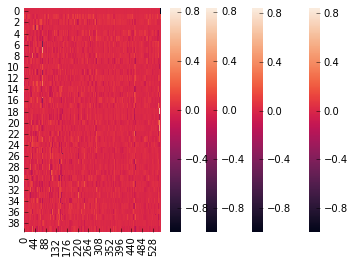

In [43]:
plt.show()

## Train Using Random Forest with 20 Trees

In [19]:
rf = RandomForestClassifier(40)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

cf(np.argmax(y_test.as_matrix(), axis=1), np.argmax(y_pred, axis=1))

print rf.score(x_test, y_test)


0.891075670173


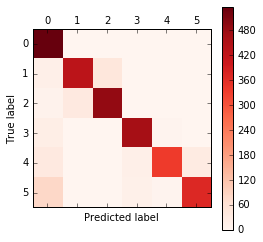

In [20]:

plt.matshow(cf(np.argmax(y_test.as_matrix(), axis=1), np.argmax(y_pred, axis=1)), cmap='Reds')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## visualizing the data

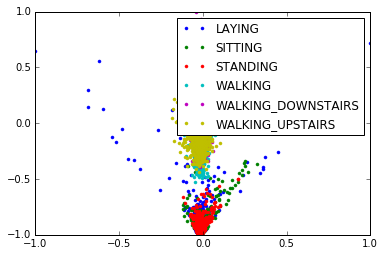

In [21]:
groups = train_data.groupby('Activity')

for name, group in groups:
    plt.plot(group['tBodyAcc-mean()-Y'], group['tBodyAccMag-mean()'], '.', label=name)

plt.legend(loc='best')
plt.show()